In [2]:
from scipy import special

x = [2, 3, 25.5]
special.polygamma(0, x)

array([0.42278434, 0.92278434, 3.21894247])

In [1]:
import os
import matplotlib.pyplot as plt

# EOReader
from eoreader.reader import Reader
from eoreader.bands import *

In [2]:
home = "/home/jp/Downloads/"
# Open the Sentinel-1 products
s1_paths = "ICEYE_SM_Example_Dataset_Brazil_Acre_22-07-2021.zip"

home2 = '/home/jp/Downloads/~/Downloads/'
prod2 = 'S1A_IW_GRDH_1SDV_20150509T085850_20150509T085915_005842_007849_F3E8.zip'

In [3]:
reader = Reader()
# The reader will recognize the constellation from its product structure
s1_prod = reader.open(home2+prod2)

# Load some bands and index
#bands = s1_prod.load([VV, VH])

# Create a stack with some bands
#stack = s1_prod.stack([VV_DSPK, VH_DSPK], stack_path="s1_stack.tif")


/home/jp/.local/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/jp/.local/lib/python3.10/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


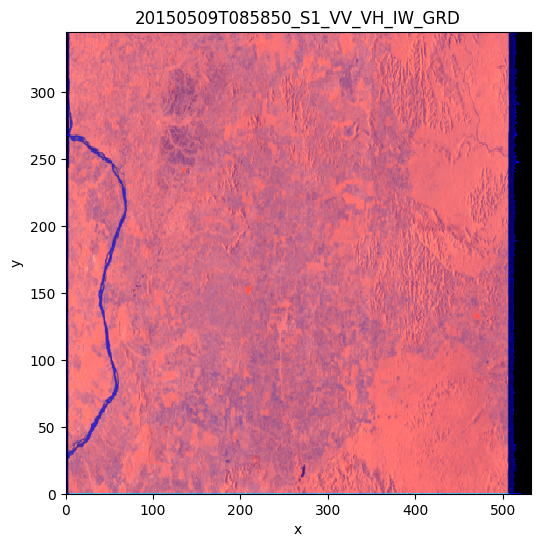

In [4]:
s1_prod.plot()
#s1_prod.bands

In [6]:
vv_bands = s1_prod.load(VV)[VV]

Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2015-05-01T00:00:000Z TO 2015-05-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2015-05-01T00:00:000Z TO 2015-05-31T24:00:000Z]
version = 2.43
Copernicus_DSM_COG_10_S07_00_W052_00_DEM.tif
Copernicus_DSM_COG_10_S07_00_W051_00_DEM.tif
Copernicus_DSM_COG_10_S07_00_W050_00_DEM.tif
Copernicus_DSM_COG_10_S07_00_W049_00_DEM.tif
....10%....20%....30%....Copernicus_DSM_COG_10_S08_00_W052_00_DEM.tif
Copernicus_DSM_COG_10_S08_00_W051_00_DEM.tif
Copernicus_DSM_COG_10_S08_00_W050_00_DEM.tif
Copernicus_DSM_COG_10_S08_00_W049_00_DEM.tif
40%....50%....60%....70%....80%.Copernicus_DSM_COG_10_S09_00_W052_00_DEM.tif
Copernicus_DSM_COG_10_S09_00_W051_00_DEM.tif
Copernicus_DSM_COG_10_

In [6]:
s1_prod[0]

TypeError: 'S1Product' object is not subscriptable

In [4]:
prod = s1_prod

# Print some data
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")

# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()

base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

Acquisition datetime: 2015-05-09 08:58:50.893876
Condensed name: 20150509T085850_S1_VV_VH_IW_GRD
Executing processing graph
version = 2.43
....10%....20%....30%..

In [5]:
# Imports
import os
import geopandas as gpd
import rasterio
from shapely.geometry import box

from rasterio.windows import Window, from_bounds
from eoreader.reader import Reader
from eoreader.bands import NDWI, SWIR_1

import hvplot.pandas
import hvplot.xarray

hvplot.extension('matplotlib')

In [10]:
prod = s1_prod
band = HV

In [11]:
# window_gdf = gpd.read_file(window_path)
# window_gdf.to_crs("EPSG:4326").hvplot(coastline="10m")
prod.plot()

/home/jp/.local/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/jp/.local/lib/python3.10/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


/home/jp/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/jp/.local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]
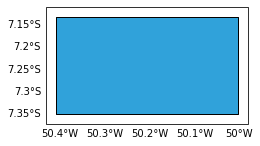

In [8]:
window = gpd.read_file(home2+'mask.geojson')
window.to_crs("EPSG:4326").hvplot(coastline="10m")

In [9]:
# Here we have an array of the bounds (tuple or list also works)
window_bounds = window.bounds.values[0]
window_bounds

array([-50.4092,  -7.3492, -50.0035,  -7.1327])

In [16]:
band = VV
prod = s1_prod
# Here we construct a Window containing directly the pixels 
# It is not necessary to have a window with integers values, they will be rounded when needed.
# However, it is better to control exactly the pixels you want so it is advised to round the values yourself
with rasterio.open(str(prod.get_band_paths([VV])[VV])) as ds:
    window_pix = from_bounds(*window_bounds, ds.transform)
window_pix

Executing processing graph
version = 2.43
....10%....20%....30%.

Killed


RuntimeError: Something went wrong with SNAP!

In [17]:
def load(prod, window):
    """
    Function that loads the wanted band over a proposed window and cleans the temporary directory.    
    """
    ds = prod.load(
        band,
        window=window
    )
    prod.clean_tmp()
    return ds[band]

In [18]:
band_arr_win_bounds = load(prod, window_bounds)

Executing processing graph
version = 2.43
....10%....20%....30%.

Killed


RuntimeError: Something went wrong with SNAP!